In [1]:
import matplotlib.pyplot as plt
import numpy as np

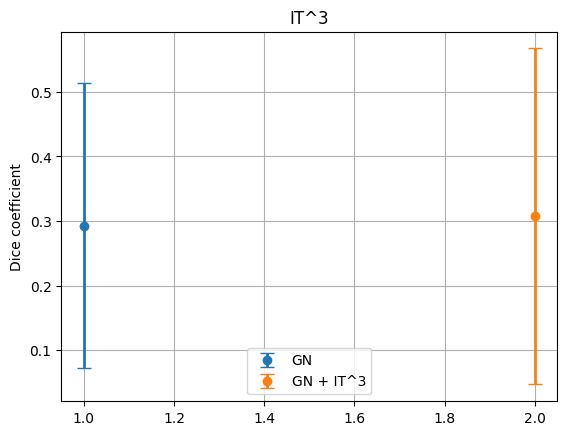

In [10]:
# Example data
# means = np.array([0.056, 0.327, 0.357])  
# std_devs = np.array([0.094, 0.212, 0.209])  
# x = np.array([1, 2, 3])  
# labels = ["BN-eval-mode", "BN-train-mode", "BN + IT^3"]

means = np.array([0.293, 0.307])
std_devs = np.array([0.22, 0.26])
x = np.array([1, 2])
labels = ["GN", "GN + IT^3"]

# Create the plot
plt.figure()

# Plot each point with a separate error bar and legend entry
for i in range(len(x)):
    plt.errorbar(
        x[i], means[i], yerr=std_devs[i], fmt='o', capsize=5, elinewidth=2,
        label=labels[i]
    )

# Add labels and title
# plt.xlabel('X-axis')
plt.ylabel('Dice coefficient')
plt.title('IT^3')
plt.grid()

# Add legend
plt.legend()

# Show the plot
# plt.show()
plt.savefig("plots/graphs/IT3-BN.png", dpi=600)

In [30]:
import torch

x = torch.zeros((5, 1))
x[0, 0] = 12023
x[1, 0] = -2000
x[2, 0] = 2
x[3, 0] = -2000
x[4, 0] = -2000

In [24]:
x.sigmoid()

tensor([[1.0000],
        [0.0000],
        [0.8808],
        [0.5000],
        [0.5000]])

In [26]:
x.sigmoid().log()

tensor([[ 0.0000],
        [   -inf],
        [-0.1269],
        [-0.6931],
        [-0.6931]])

In [27]:
torch.nn.LogSigmoid()(x)

tensor([[ 0.0000e+00],
        [-2.0000e+03],
        [-1.2693e-01],
        [-6.9315e-01],
        [-6.9315e-01]])

In [31]:
- (x.sigmoid() * torch.nn.LogSigmoid()(x)).sum()

tensor(0.1118)

In [33]:
from torch.distributions import Categorical
Categorical(x).entropy().sum()

tensor(5.9605e-07)

In [34]:
torch.special.entr(x)

tensor([[-1.1295e+05],
        [       -inf],
        [-1.3863e+00],
        [       -inf],
        [       -inf]])

In [1]:
import nibabel as nib
import torch

def load_nii(filepath):
    nii_img = nib.load(filepath)
    return torch.tensor(nii_img.get_fdata(), dtype=torch.float32)


torch.Size([216, 216, 216])


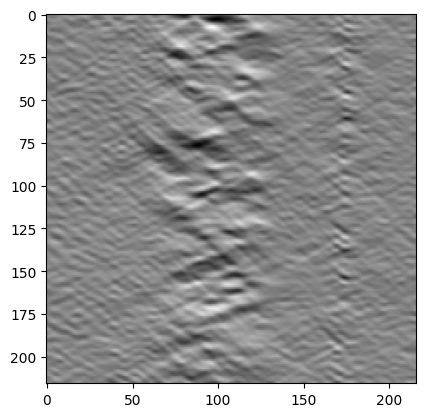

In [ ]:
import matplotlib.pyplot as plt
tomo = load_nii("/media/ssd3/diyor/membrain-seg-data/MemBrain_seg_training_data/imagesTr/deepict_TS_0007_patch0_raw_split0_0000.nii.gz")

print(tomo.shape)
plt.imshow(tomo[80], cmap='gray')

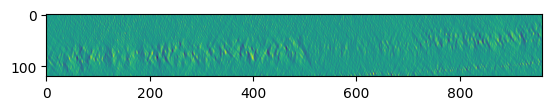

In [21]:
import mrcfile


tomo = mrcfile.read("/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/tomograms/TS_0007_trimmed.rec")

plt.imshow(tomo[:, 80])

In [7]:
torch.unique(tomo)

torch.count_nonzero(tomo == 0)

tensor(768322)

In [5]:
tomo.mean(), tomo.std()

(tensor(1.2365), tensor(13.7414))

In [12]:
from monai.networks.nets import DynUNet


_model = DynUNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    kernel_size=(3, 3, 3, 3, 3, 3),
    strides=(1, 2, 2, 2, 2, 2),
    upsample_kernel_size=(1, 2, 2, 2, 2, 2),
    # filters=[32, 64, 128, 256, 512, 1024],
    filters=(8, 16, 32, 64, 128, 256),
    res_block=True,
    deep_supervision=True,
    deep_supr_num=2,
)

pytorch_total_params = sum(p.numel() for p in _model.parameters())



In [13]:
pytorch_total_params

5702091

In [14]:
from torchinfo import summary

summary(_model)

Layer (type:depth-idx)                                            Param #
DynUNet                                                           --
├─UnetResBlock: 1-1                                               --
│    └─Convolution: 2-1                                           --
│    │    └─Conv3d: 3-1                                           216
│    └─Convolution: 2-2                                           --
│    │    └─Conv3d: 3-2                                           1,728
│    └─LeakyReLU: 2-3                                             --
│    └─InstanceNorm3d: 2-4                                        16
│    └─InstanceNorm3d: 2-5                                        16
│    └─Convolution: 2-6                                           --
│    │    └─Conv3d: 3-3                                           8
│    └─InstanceNorm3d: 2-7                                        16
├─ModuleList: 1-2                                                 --
│    └─UnetResBlock: 2-8  